In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
local_zip = './cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

In [4]:
print(len(os.listdir('./PetImages/Cat/')))
print(len(os.listdir('./PetImages/Dog/')))

1500
1500


In [5]:
# Using os.mkdir to create your directories
# creating a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):  # listing of the contents of that directory
        file = SOURCE + filename   
        if os.path.getsize(file) > 0:   # gives the size of the file
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))   # shuffles a list
    training_set = shuffled_set[0:training_length] #randomized, so that the training set is a random
    testing_set = shuffled_set[:testing_length]  # the test set is the remaining files

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)   

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [7]:
CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

In [9]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [10]:
print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

1487
1376
290
150


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
TRAINING_DIR = "cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 2863 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
29/29 [==============================] - 120s 3s/step - loss: 0.8103 - accuracy: 0.5295 - val_loss: 0.6544 - val_accuracy: 0.6886
Epoch 2/15
29/29 [==============================] - 32s 1s/step - loss: 0.6835 - accuracy: 0.5798 - val_loss: 0.6475 - val_accuracy: 0.6909
Epoch 3/15
29/29 [==============================] - 31s 1s/step - loss: 0.6545 - accuracy: 0.6057 - val_loss: 0.6066 - val_accuracy: 0.7205
Epoch 4/15
29/29 [==============================] - 33s 1s/step - loss: 0.6504 - accuracy: 0.6186 - val_loss: 0.5983 - val_accuracy: 0.6841
Epoch 5/15
29/29 [==============================] - 31s 1s/step - loss: 0.6390 - accuracy: 0.6357 - val_loss: 0.6305 - val_accuracy: 0.6364
Epoch 6/15
29/29 [==============================] - 31s 1s/step - loss: 0.6170 - accuracy: 0.6504 - val_loss: 0.6391 - val_accuracy: 0.6500
Epoch 7/15
29/29 [==============================] - 31s 1s/step - loss: 0.6146 - accuracy: 0.6601 - val_loss: 0.5859 - val_accuracy: 0.7250
Epoch 8/15
29/29 [=

<Figure size 432x288 with 0 Axes>

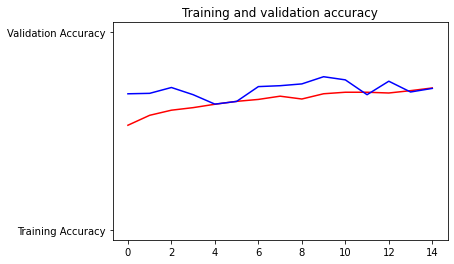

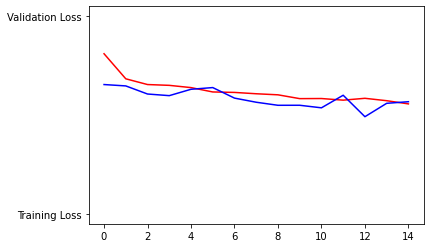

<Figure size 432x288 with 0 Axes>

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

# Testing images on the model

In [ ]:
import numpy as np
from keras.preprocessing import image

images = os.listdir("/tmp/test_images")

print(images)

for i in images:
 print()
 # predicting images
 path = '/tmp/images/' + i
 img = image.load_img(path, target_size=(150, 150))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a dog")
 else:
   print(i + " is a cat")